# `README.md`
---

In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 144
%config InlineBackend.figure_format = 'retina'

## A Star Network

(-4.0, 4.0, -4.0, 4.0)

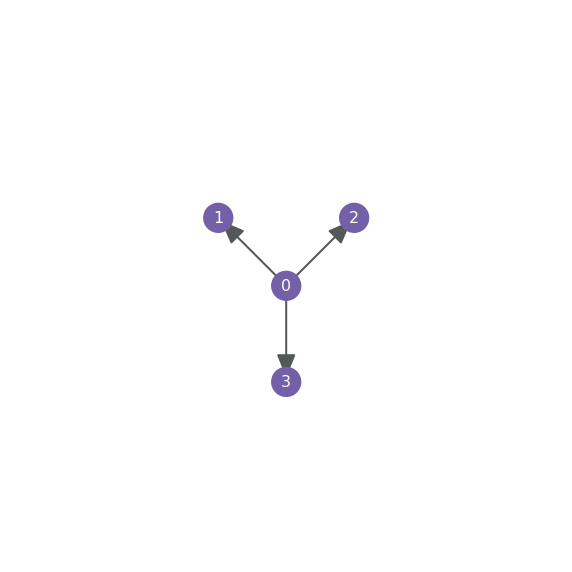

In [3]:
>>> import numpy as np
>>> import netsci.visualization as nsv
>>> A = np.array([[0,1,1,1], [0,0,0,0], [0,0,0,0], [0,0,0,0]])
>>> nsv.plot_directed_network(A, pos=[[0,0],[-1,1],[1,1],[0,-np.sqrt(2)]])

plt.xlim([-4,4]); plt.ylim([-4,4])
plt.axis('off')

In [4]:
>>> import netsci.metrics.motifs as nsm
>>> f = nsm.motifs(A, algorithm='brute-force')
>>> print(f)

[1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


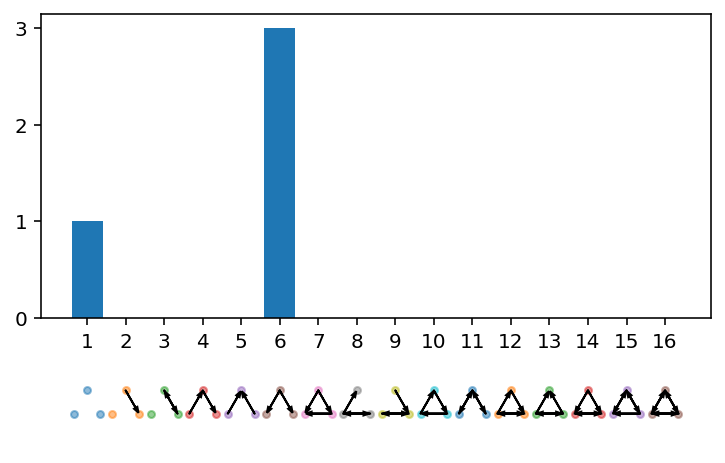

In [5]:
>>> ax = nsv.bar_motifs(f)

ax[0].set_yticks(range(max(f)+1))

## Using GPU

In [6]:
from netsci.models.random import erdos_renyi

A_er = erdos_renyi(n=1000, p=0.01, random_state=71070)  # Create Erdős–Rényi network
print(nsm.motifs(A_er, algorithm='gpu'))                       # Count motifs using a GPU

2022-05-07 11:59:15.432764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[156453141   9481653     37283     95997     47667     48287      1001
       843       769       334         2         9         5         9
         0         0]
